In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Students' Academic Performance Dataset
[reference](https://www.kaggle.com/code/kanncaa1/factors-affecting-success-in-school)

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas_profiling import ProfileReport
from IPython.display import display, HTML

import plotly.express as px
from plotly.figure_factory import create_distplot

%matplotlib inline
%config InlineBackend.figure_format='retina'
warnings.filterwarnings("ignore")

## Features

In [3]:
df = pd.read_csv("./xAPI-Edu-Data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [119]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
numeric_class               0
dtype: int64

$\begin{aligned}
\rightarrow \quad &\textbf{There is no missing Value}
\end{aligned}$

In [5]:
df.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


$\begin{aligned}
\rightarrow \quad &\textbf{Categorical Feature}: 13 \\
                  &\textbf{Continuous Feature}: 4
\end{aligned}$

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
raisedhands,480.0,46.775000,30.779223,0.0,15.75,50.0,75.0,100.0
VisITedResources,480.0,54.797917,33.080007,0.0,20.00,65.0,84.0,99.0
AnnouncementsView,480.0,37.918750,26.611244,0.0,14.00,33.0,58.0,98.0
Discussion,480.0,43.283333,27.637735,1.0,20.00,39.0,70.0,99.0


$\begin{aligned}
\rightarrow \quad &\textbf{There are no Outliers}
\end{aligned}$

In [7]:
df['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [8]:
df['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

## Visualization

In [9]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

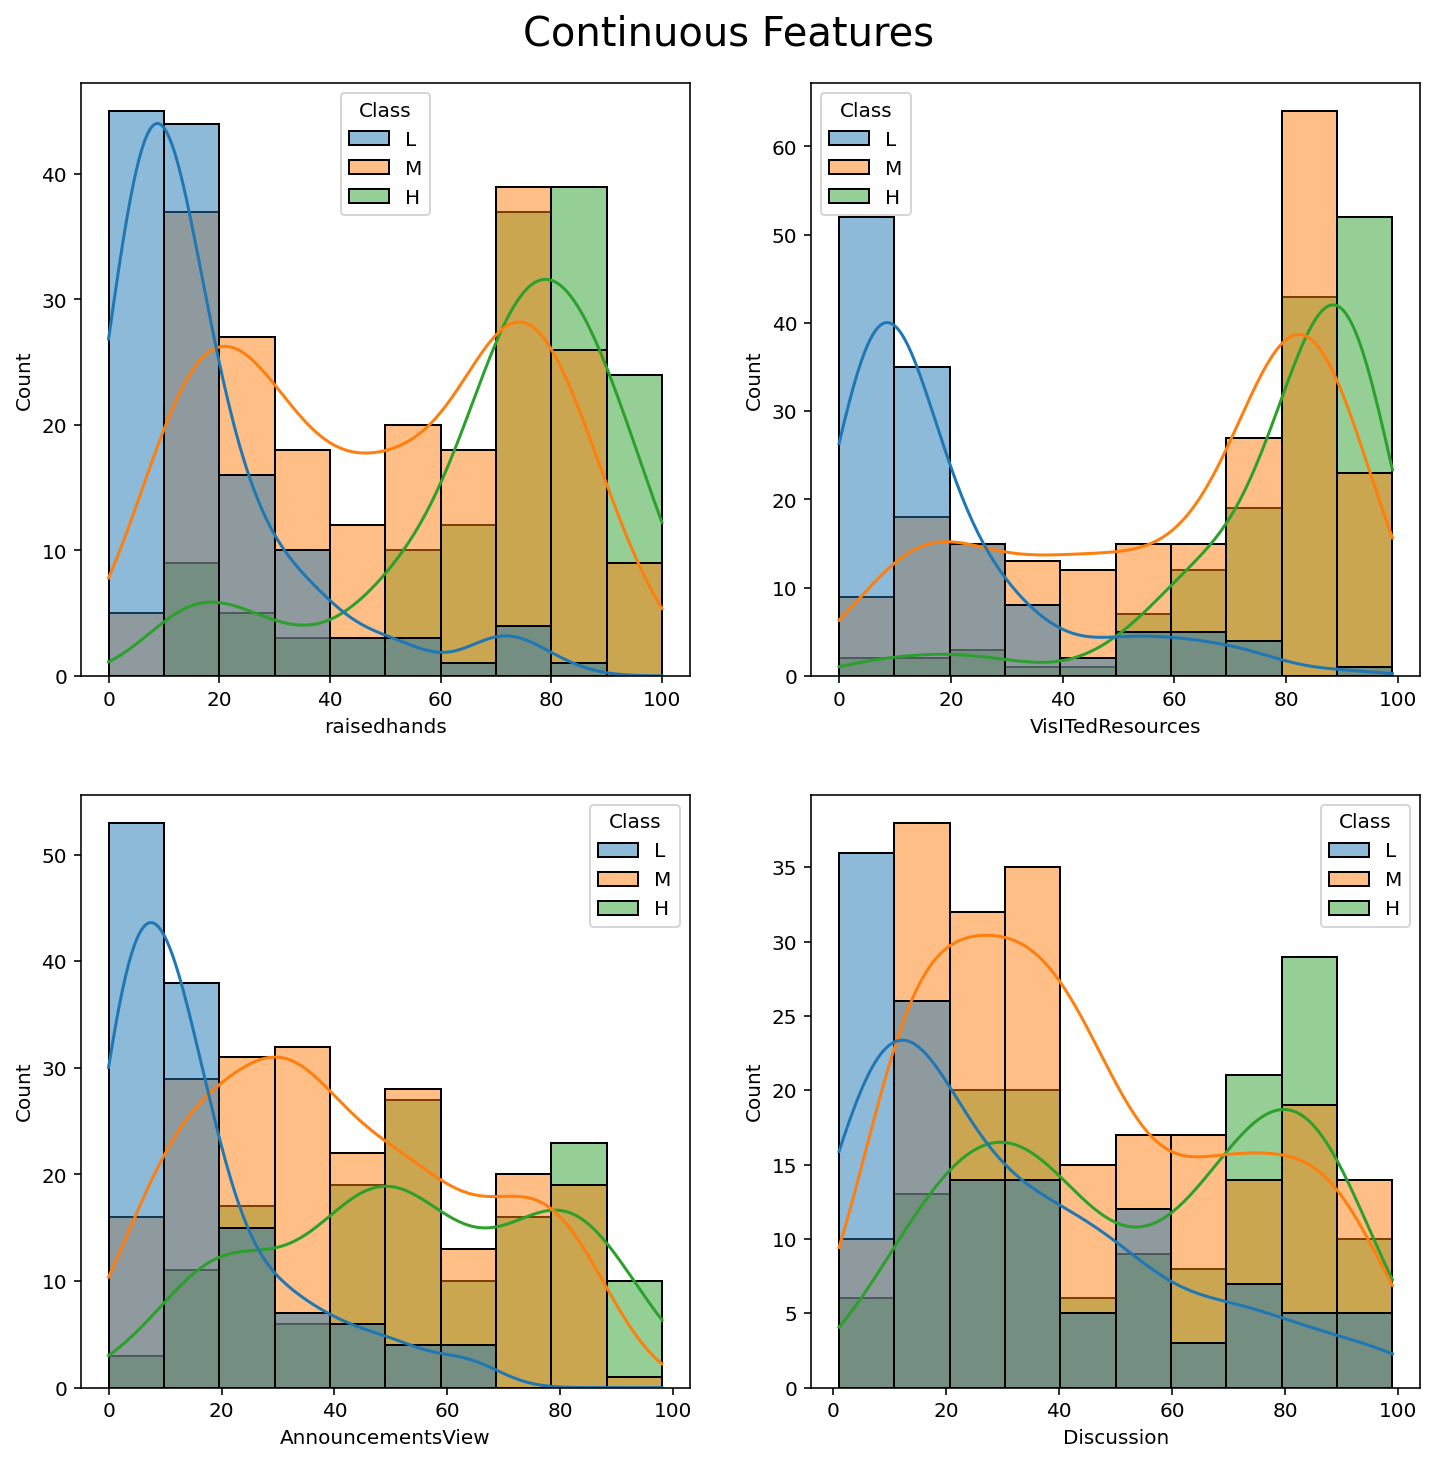

In [10]:
# Continuous Features
fig, axes = plt.subplots(2,2, figsize=(12,12))
fig.suptitle('Continuous Features', y=0.92, fontsize=20)

sns.histplot(ax=axes[0,0], x='raisedhands', data=df, hue='Class', hue_order=['L','M','H'], kde=True)

sns.histplot(ax=axes[0,1], x='VisITedResources', data=df, hue='Class', hue_order=['L','M','H'], kde=True)

sns.histplot(ax=axes[1,0], x='AnnouncementsView', data=df, hue='Class', hue_order=['L','M','H'], kde=True)

sns.histplot(ax=axes[1,1], x='Discussion', data=df, hue='Class', hue_order=['L','M','H'], kde=True)

plt.show()

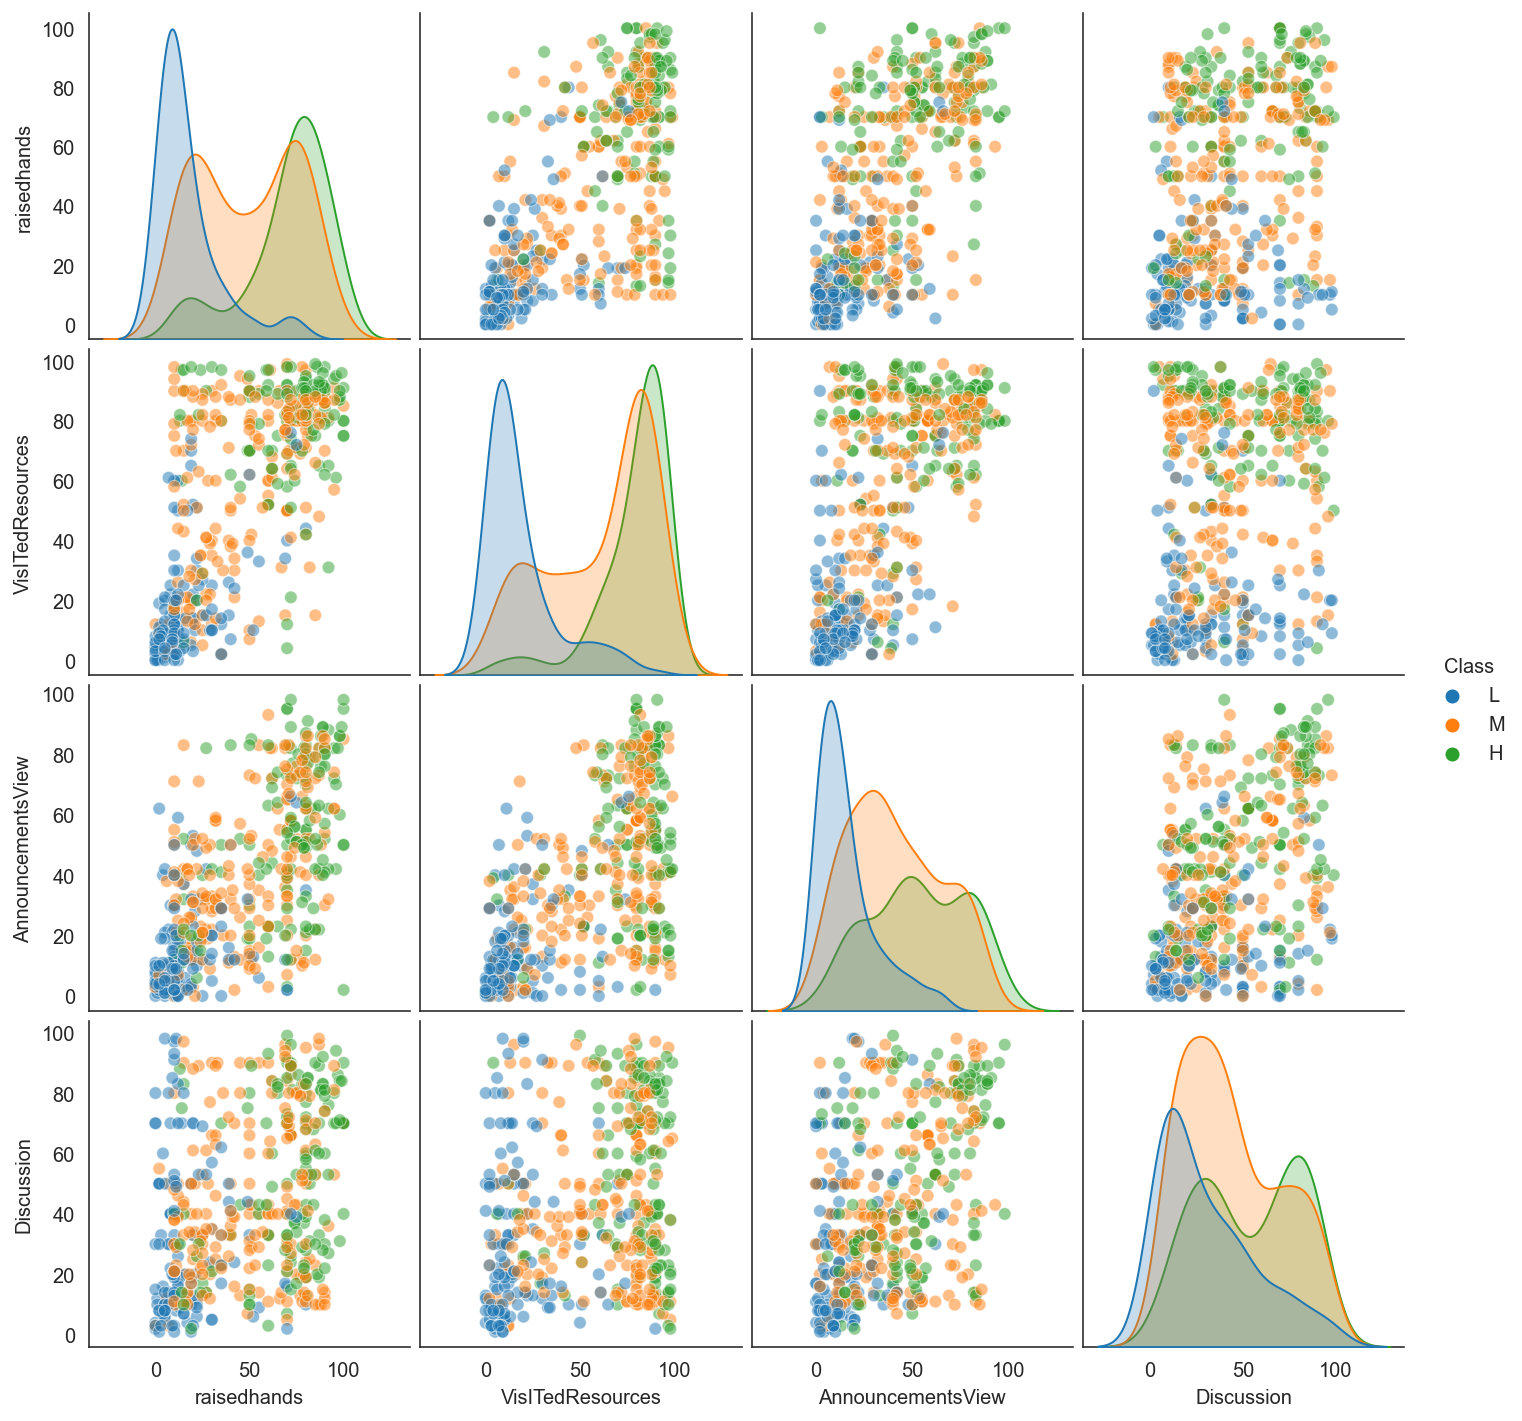

In [11]:
display(HTML("<style>div.output_scroll { height: 72em; }</style>")) ## Control to Ouput height size

sns.set_style('white')
g = sns.pairplot(data=df,
                 #diag_kind='hist',
                 corner=False,
                 plot_kws=dict(s=40, alpha=0.5),
                 #palette='cividis',
                 hue='Class',
                 hue_order=['L','M','H']
                )
plt.show()

$\begin{aligned}
\rightarrow \quad &\textbf{좋은 Features이면서 Correlation이 낮으면 적절히 나뉘면서 넓게 분포} \\
                  &\text{예를들어 'raisedhands'와 'VisITedResources'는 Corr값이 낮고(넓게 분포) Class구분이 요연함} \\
                  &\text{Target Feature와 Corr이 높으면서 Training Features끼리는 Corr값이 낮은게 좋은 Feature}
\end{aligned}$

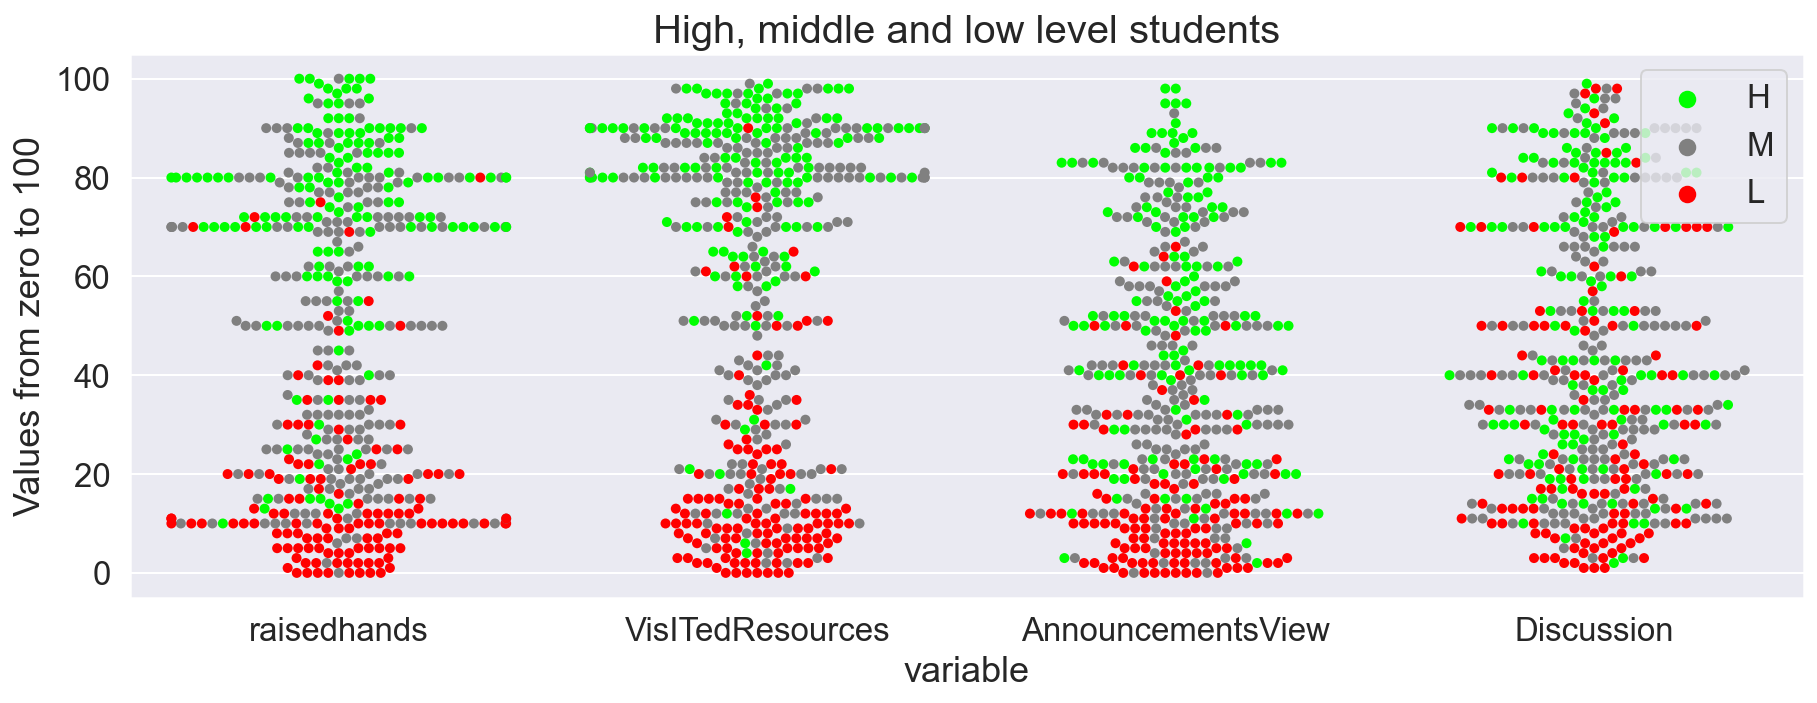

In [12]:
melt = pd.melt(df, id_vars='Class', value_vars=['raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion'])

plt.figure(figsize=(15,5))
sns.set(font_scale=1.5)
sns.swarmplot(x='variable', y='value', hue='Class', data=melt,
              palette={'H':'lime', 'M':'grey', 'L':'red'}, hue_order=['H','M','L'])
plt.ylabel('Values from zero to 100')
plt.title('High, middle and low level students', fontsize=20)
plt.legend(loc='upper right')
plt.show()

$\begin{aligned}
\rightarrow \quad &\textbf{There are some students who take low level class although they have higher values of raising hands, visiting resources and viewing announcements}
\end{aligned}$

In [13]:
len(df['raisedhands'])

480

In [14]:
ave_raisedhands = sum(df['raisedhands'])/len(df['raisedhands'])
ave_VisITedResources = sum(df['VisITedResources'])/len(df['VisITedResources'])
ave_AnnouncementsView = sum(df['AnnouncementsView'])/len(df['AnnouncementsView'])
#ave_Discussion = sum(df['Discussion'])/len(df['Discussion'])

unsuccess = df.loc[(df['raisedhands'] >= ave_raisedhands) & 
                     (df['VisITedResources']>=ave_VisITedResources) & 
                     (df['AnnouncementsView']>=ave_AnnouncementsView) & 
                     #(df['Discussion']>=ave_Discussion) &
                     (df['Class'] == 'L')
                    ]
print(unsuccess)

    gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
444      M      Jordan       Jordan  MiddleSchool    G-08         A   
445      M      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
444  Chemistry        F      Mum           75                72   
445  Chemistry        S      Mum           72                76   

     AnnouncementsView  Discussion ParentAnsweringSurvey  \
444                 64          39                   Yes   
445                 66          40                   Yes   

    ParentschoolSatisfaction StudentAbsenceDays Class  
444                     Good            Above-7     L  
445                     Good            Above-7     L  


In [15]:
# Transform Categorical Data 'Class' to Numerical Data
df['numeric_class'] = [1 if df.loc[i, 'Class'] == 'L' 
                         else 2 if df.loc[i, 'Class'] == 'M' 
                         else 3 
                         for i in range(len(df))]

Jordan average: 2.09


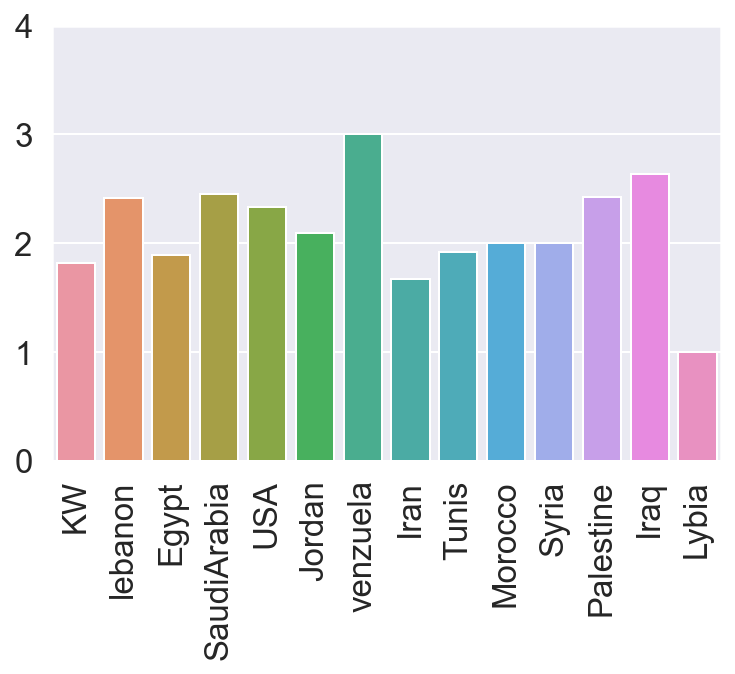

In [94]:
nation = df.NationalITy.unique()
nation_grades_ave = [sum(df[df.NationalITy == i].numeric_class)/float(len(df[df.NationalITy == i])) 
                     for i in nation]

ax = sns.barplot(x=nation, y=nation_grades_ave)
jordan_ave = sum(df[df.NationalITy == 'Jordan'].numeric_class)/float(len(df[df.NationalITy == 'Jordan']))
print(f'Jordan average: {jordan_ave:.2f}')
plt.xticks(rotation=90)
plt.ylim(0, 4)
plt.show()

In [88]:
nation_df = pd.DataFrame(data=nation_grades_ave, index=nation, columns=['Nation_Grades_Ave'])

fig = px.histogram(nation_df, x=nation_df.index, y='Nation_Grades_Ave', 
                   color_discrete_sequence=px.colors.qualitative.Pastel2,
                  )
fig.update_layout(
    title_text="Nation Grade Average",
    xaxis_title="Nation",
    yaxis_title="Nation Grade Average")
fig.show()

Chemistry Average: 2.08


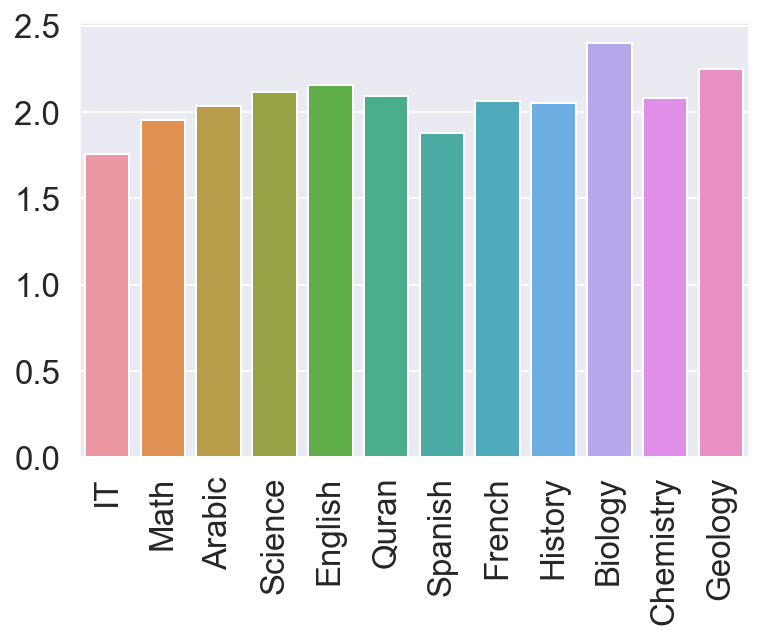

In [95]:
lessons = df.Topic.unique()
lessons_ave = sum(df[df.Topic=='Chemistry'].numeric_class)/float(len(df[df.Topic=='Chemistry']))
print(f'Chemistry Average: {lessons_ave:.2f}')

lessons_grade_ave = [sum(df[df.Topic==i].numeric_class)/float(len(df[df.Topic==i])) for i in lessons]

ax = sns.barplot(x=lessons, y=lessons_grade_ave)
plt.xticks(rotation=90)
plt.show()

In [107]:
lessons_df = pd.DataFrame(data=lessons_grade_ave, index=lessons, columns=['Lessons_Grade_Ave'])
lessons_df_ascending = lessons_df.sort_values(by=['Lessons_Grade_Ave'], ascending=0)

fig = px.histogram(lessons_df_ascending,
                   x=lessons_df_ascending.index, y='Lessons_Grade_Ave', 
                   color_discrete_sequence=px.colors.qualitative.Pastel2,b
                  )
fig.update_layout(
    title_text="Lessons Grade Average",
    xaxis_title="Lesson",
    yaxis_title="Lessons Grade Average")
fig.show()

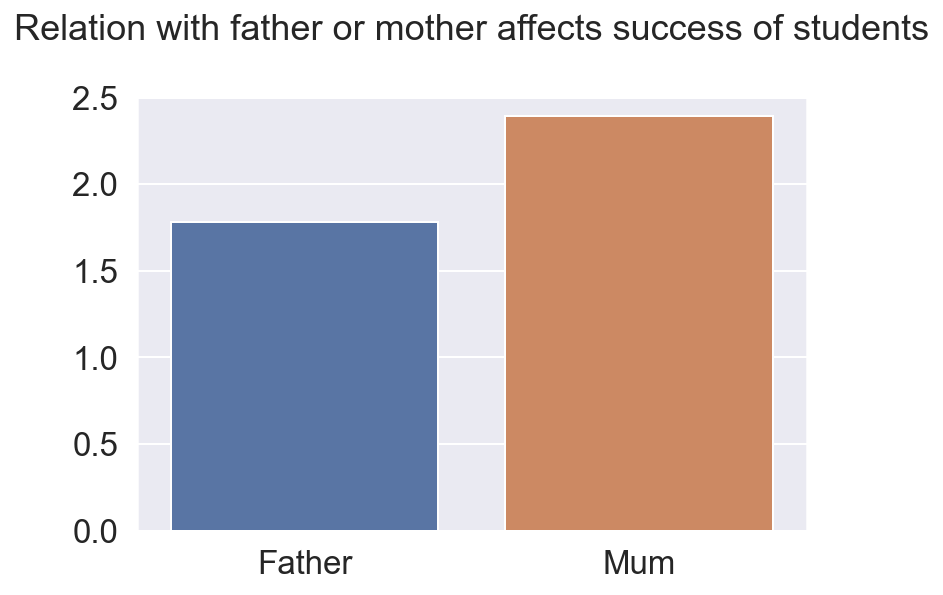

In [118]:
relation = df.Relation.unique()
relation_grade_ave = [sum(df[df.Relation == i].numeric_class)/float(len(df[df.Relation == i])) for i in relation]
ax = sns.barplot(x=relation, y=relation_grade_ave)
plt.title('Relation with father or mother affects success of students', y=1.1)
plt.show()

...